# Elastic fields around a finite dislocation segment

Plane Elastic problem

We test the computation of the displacements and stresses at observation points for a single segment displacement discontinuity element. 

We impose a unit displacement discontinuity on a segment centered  around the origin:

$\Delta u_i (x_1,x_2=0)=u_i^-(x_1,x_2=0)-u_i^+(x_1,x_2=0)= 1 $  for $x_1 \in [-a,a]$, and $i=1,\,2$ with $a=2.3$

in a linearly infinite isotropic elastic solid with properties:
- Shear modulus $G= 15.2 $
- Poisson's ratio $\nu=0.25$ 

In [2]:
# %% importing BigWham 
import numpy as np

from bigwham4py import BEMatrix
#%% Elastic properties of the medium
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)

# %% Mesh of 1 element for an unit segment dislocation
a = 2.3
nelts = 1
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)

We use the "2DS0-H" kernel for a mesh with a "single" element. 

In [ ]:
kernel = "2DS0-H"
elas_prop = np.array([E, nu])
eta=3.0
max_leaf_size = 64
eps_aca = 1.0e-3
h = BEMatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

#colpts=h.getCollocationPoints()


NUM OF AVAILABLE OMP THREADS: 16
BigWham using 8 OpenMP threads
 Now setting things for kernel ... 2DS0-H with properties size 2
--------------------
Hierarchical representation creation ...
Cluster tree creation time for the source mesh :  0
Cluster tree creation time for the source mesh :  0
Time for binary cluster tree construction  5e-06
 binary cluster tree depth =0
 Number of blocks =1
 Number of full blocks =0
 Number of low rank blocks =1
Pattern Created 
Hierarchical representation complete.
--------------------
Populating Hierarchical matrix ...
 Loop on full blocks construction  
 N full blocks 0 
Loop on low rank blocks construction
N low rank blocks 1
dof_dimension: 2
Creation of hmat done in 0.01728
Compression ratio - 2
Hmat object - built 
Hierarchical matrix construction complete.
Compression Ratio = 2, eps_aca = 0.001, eta = 3
Hierarchical matrix  construction time = :  0.017305
BigWham constructed Hmat of size (1 x 2) X (1 x 2)
--------------------


## Displacements and stresses induced by an unit displacement discontinuity segment 

We will compare the results from BigWham with analytical expressions available (see e.g. {cite}`CrSt83` pages 83-84) for the displacements and stresses along the axis $x_2=0$ on which the dislocation segment lies. We defines these expressions in two functions.

In [104]:
# solution of displacement due to a segment displacement discontinuity centered at origin and orienterd along x1-axis  (x2=0)
# displacement along y=0 - Solution from Crouch & Starfield page 82
def DD_displacement_y_0(x,a=1.,nu=0.25,d_x=1,d_y=1):
    # we code y=0- expressions ONLY
    # note Crouch convnetion: positive dd in overlap
    ux=-(1-2*nu)/(4*np.pi*(1-nu))*d_y*np.log(np.abs((x-a)/(x+a))) 
    uy= (1-2*nu)/(4*np.pi*(1-nu))*d_x*np.log(np.abs((x-a)/(x+a)))
    ux[np.where(abs(x)<a)[0]]+=0.5*d_x
    uy[np.where(abs(x)<a)[0]]+=0.5*d_y
    return ux,uy    

# solution of stresses due to a segment displacement discontinuity centered at origin and orienterd along x1-axis  (x2=0)
# displacement along y=0 - Solution from Crouch & Starfield page 82
def DD_stresses_y_0(x,a=1.,nu=0.25,G=1.,d_x=1,d_y=1):
    # we code y=0- expressions ONLY
    # note Crouch convnetion: positive dd in overlap
    fact = -G/(2*np.pi*(1-nu))
    sxx = fact*d_y*(1./(x-a)-1./(x+a))
    syy = fact*d_y*(1./(x-a)-1./(x+a))
    sxy = fact*d_x*(1./(x-a)-1./(x+a))
    return sxx,syy,sxy    


### Displacements along the line $x_2=0$ 
We will compute displacements and stresses at different points located only at a given value of $x_2$ - and compare with the elastic solution.

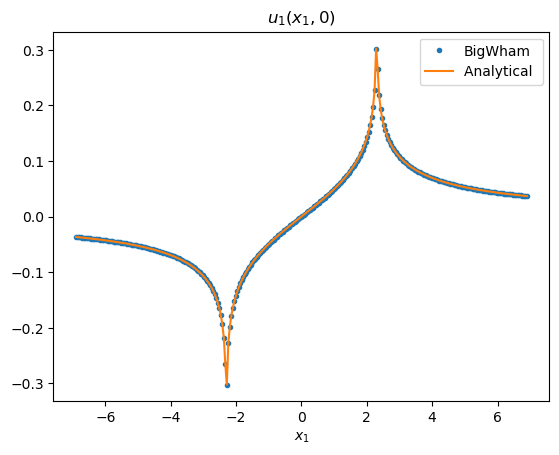

In [123]:
# x
x1_obs=np.linspace(-3.*a,3*a,300)
x2_obs = 0.
obs_pts = np.transpose([x1_obs , x1_obs*0.+x2_obs])

# we compute the solution for displacement for an unit opening dd calling Bigwham
d = np.array([0.,1.])
disp=h.compute_displacements(obs_pts,d)   

import matplotlib.pyplot as plt
uxa,uya=DD_displacement_y_0(x1_obs,a=a,nu=nu,d_x=0.,d_y=1.0)

plt.plot(x1_obs,disp[:,0],'.')
plt.plot(x1_obs,uxa) #
plt.title('$u_1(x_1,0)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham','Analytical '])

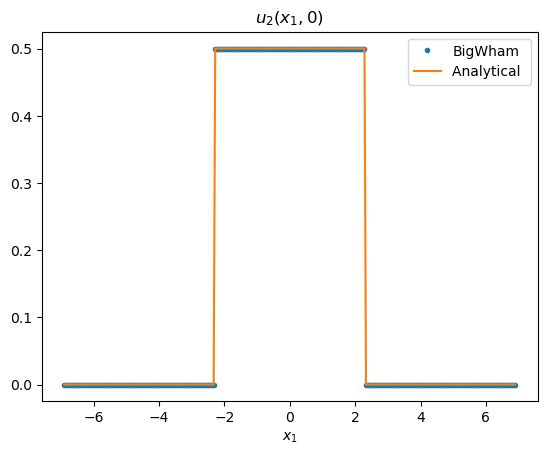

In [124]:
plt.plot(x1_obs,disp[:,1],'.')
plt.plot(x1_obs,uya) #
plt.title('$u_2(x_1,0)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham','Analytical '])

### ... on a line slightly below the dislocation segment (and parallel to it)
We now slightly offset the observations points below the $x_2=0$, to here $x_2=-0.1$. We plot the displacement components - and observe how they differ to the case $x_2=0$.

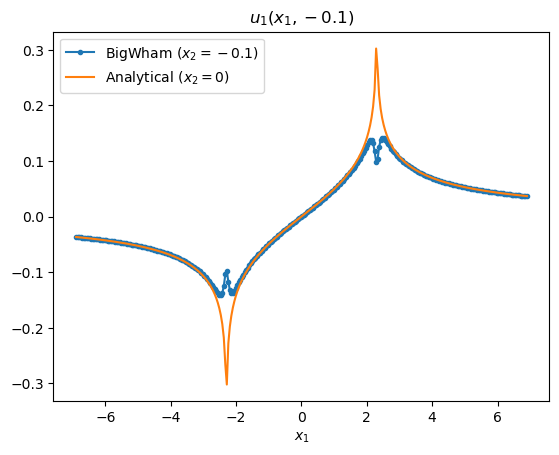

In [127]:
# check values slightly below y=0- 
obs_ptsdw = np.transpose([x1_obs,x1_obs*0.-0.1])
dispdw=h.compute_displacements(obs_ptsdw,d) 
plt.plot(x1_obs,dispdw[:,0],'.-')
plt.plot(x1_obs,uxa) #
plt.title('$u_1(x_1,-0.1)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham ($x_2=-0.1$)','Analytical ($x_2=0$)'])

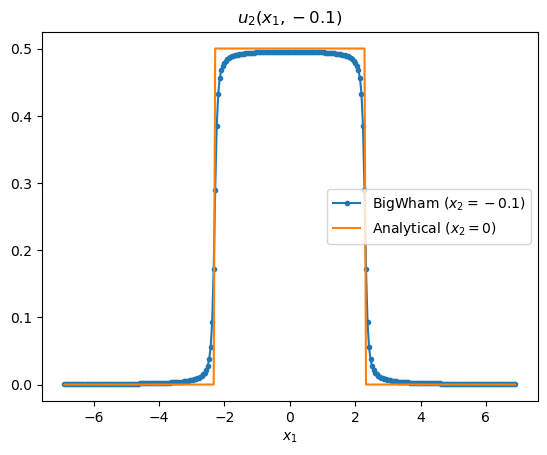

In [128]:
plt.plot(x1_obs,dispdw[:,1],'.-')
plt.plot(x1_obs,uya) #
plt.title('$u_2(x_1,-0.1)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham ($x_2=-0.1$)','Analytical ($x_2=0$)'])

### Stresses

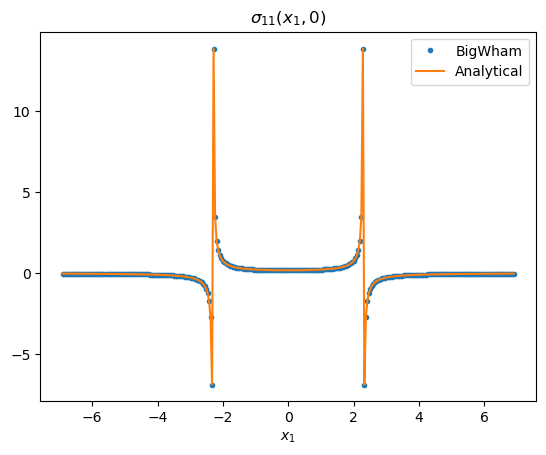

In [129]:
stress_=h.compute_stresses(obs_pts,d)
sxx_a,syy_a,sxy_a=DD_stresses_y_0(x1_obs,a=a,nu=nu,G=G,d_x=0.,d_y=1.0)

plt.plot(x1_obs,stress_[:,0],'.')
plt.plot(x1_obs,sxx_a)
plt.title('$\sigma_{11}(x_1,0)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham','Analytical'])

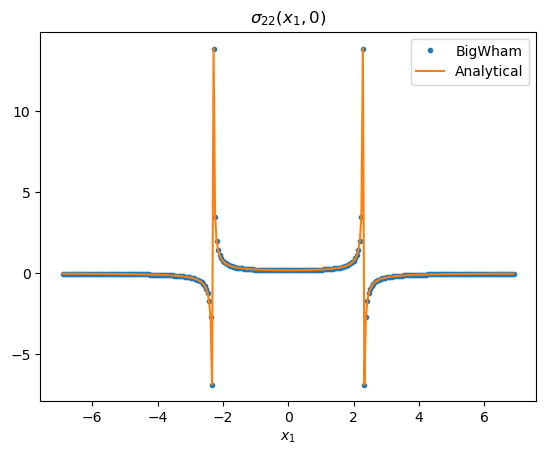

In [130]:
plt.plot(x1_obs,stress_[:,1],'.')
plt.plot(x1_obs,syy_a)
plt.title('$\sigma_{22}(x_1,0)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham','Analytical'])

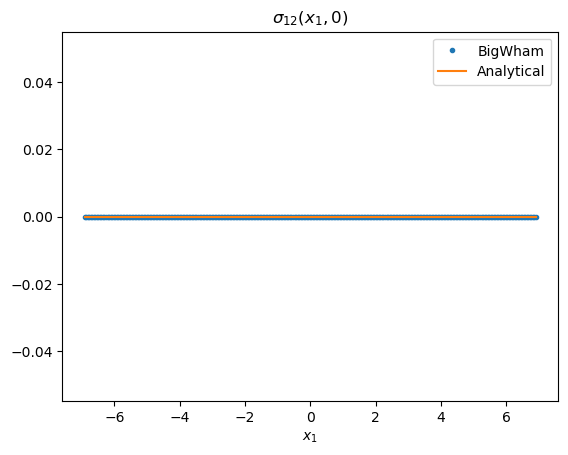

In [131]:
plt.plot(x1_obs,stress_[:,2],'.')
plt.plot(x1_obs,sxy_a)
plt.title('$\sigma_{12}(x_1,0)$')
plt.xlabel('$x_1$')
plt.legend(['BigWham','Analytical'])

## References
```{bibliography}
```
